<h1 style="text-align: center;">Tumor Prediction<h1/>

In [48]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('benign_malignant_tumor.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,15.64,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,22.94,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,26.44,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,15.77,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,15.73,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [2]:
df.shape

(569, 26)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
texture_worst        0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   points_mean        569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   dimension_mean     569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  smoothness_se      569 non-null    float64
 13  compactness_se     569 non-null    float64
 14  concavity_se       569 non-null    float64
 15  points_se          569 non-null    float64
 16  symmetry_se        569 non

In [5]:
df['diagnosis'].unique()

array(['B', 'M'], dtype=object)

In [6]:
df['diagnosis'] = df['diagnosis'].replace({'B':0,'M':1})

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,symmetry_se,dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,0.01924,0.002248,15.64,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,0.03504,0.003318,22.94,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,0.01718,0.002198,26.44,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,0.01580,0.003442,15.77,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,0.01647,0.001767,15.73,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,0,13.17,18.22,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,0.01093,0.001672,23.89,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,0,10.26,14.71,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,0.03675,0.006758,19.48,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,1,15.28,22.41,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,0.01172,0.002575,28.03,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,0,14.53,13.98,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,0.02207,0.003563,16.93,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [8]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [9]:
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,...,symmetry_se,dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,...,0.01924,0.002248,15.64,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,...,0.03504,0.003318,22.94,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,...,0.01718,0.002198,26.44,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,...,0.01580,0.003442,15.77,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,...,0.01647,0.001767,15.73,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,...,0.01093,0.001672,23.89,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,...,0.03675,0.006758,19.48,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,...,0.01172,0.002575,28.03,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,...,0.02207,0.003563,16.93,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    1
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

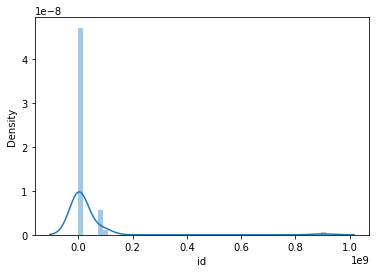

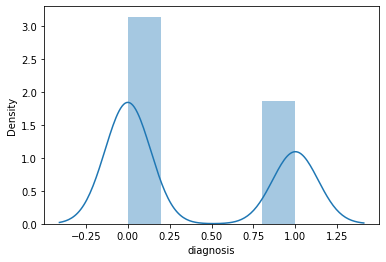

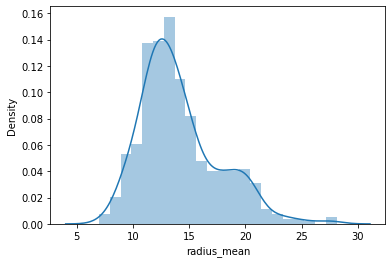

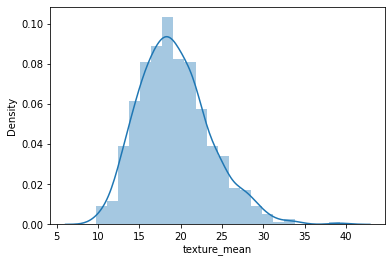

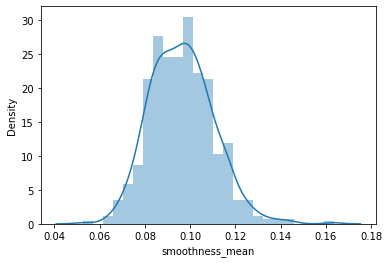

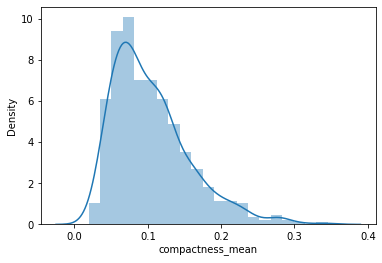

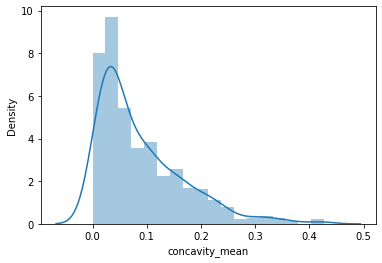

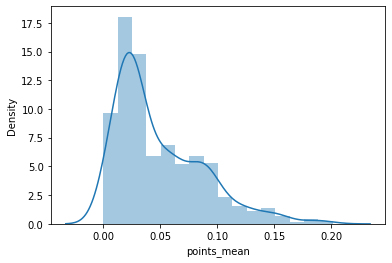

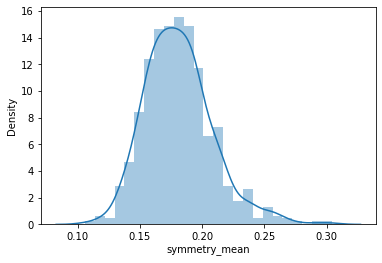

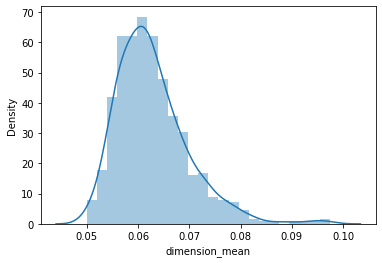

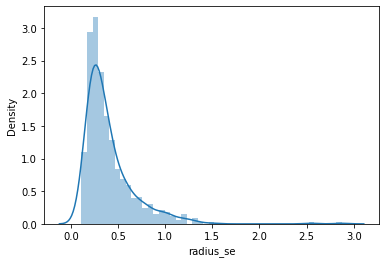

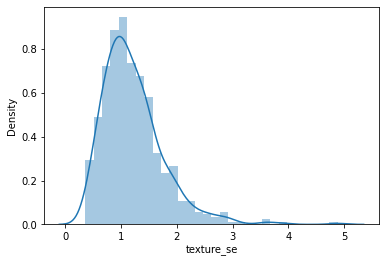

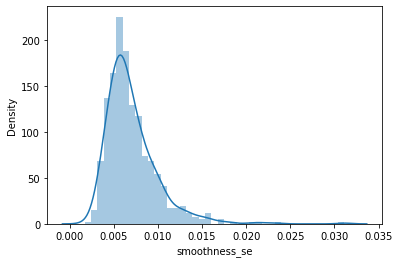

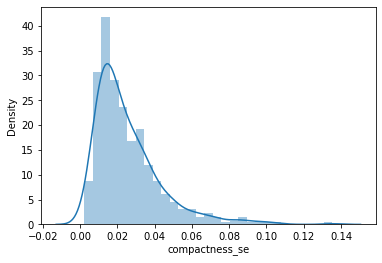

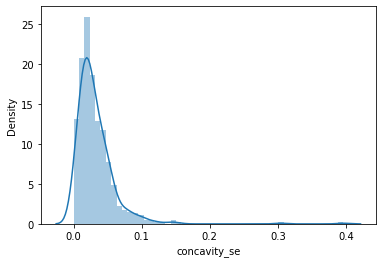

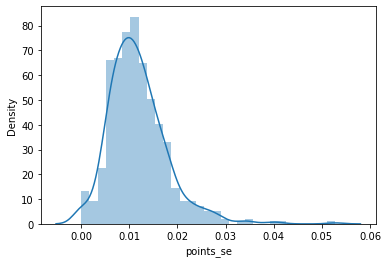

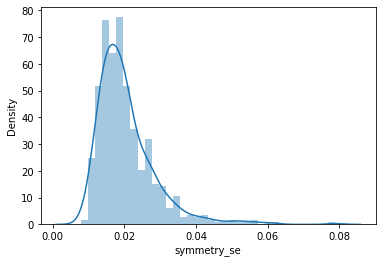

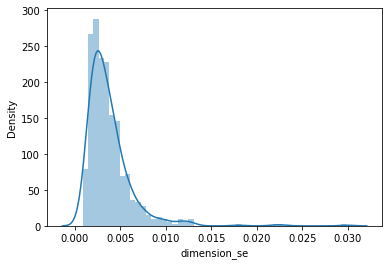

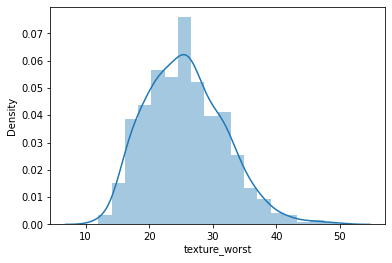

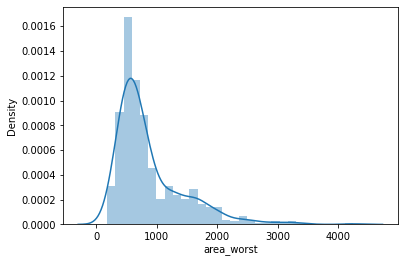

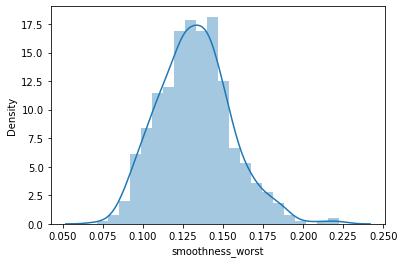

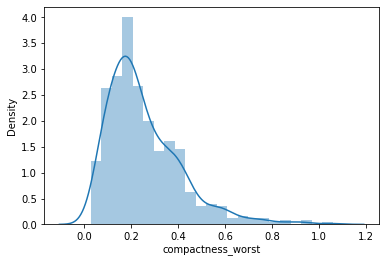

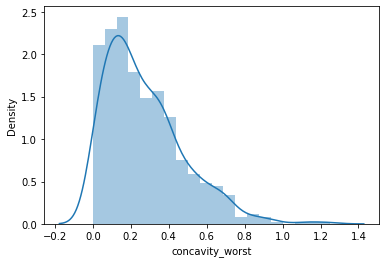

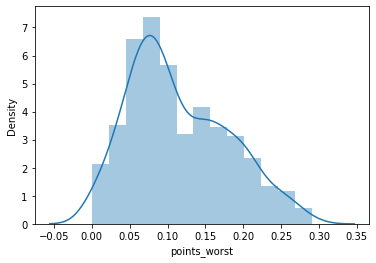

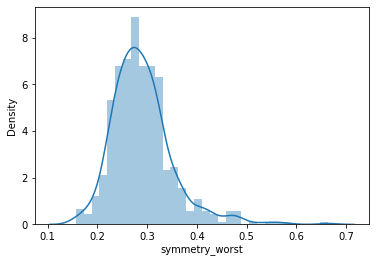

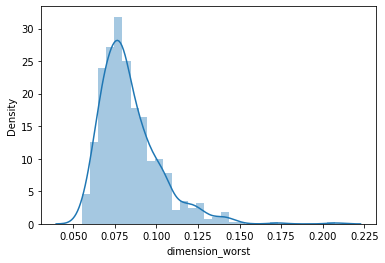

In [12]:
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])

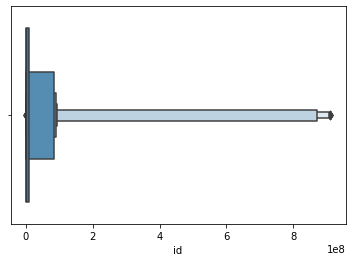

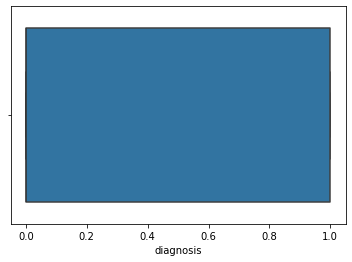

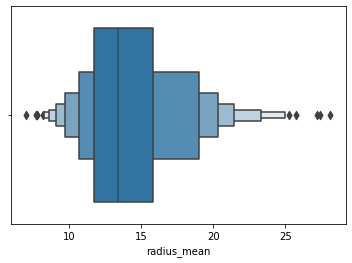

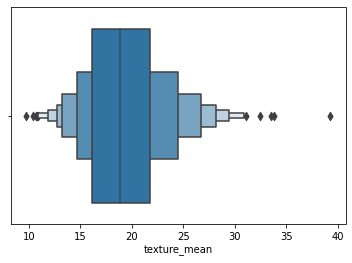

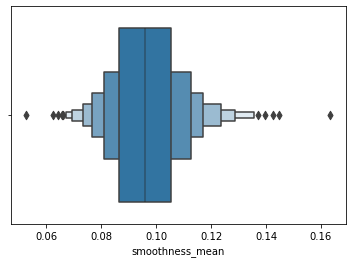

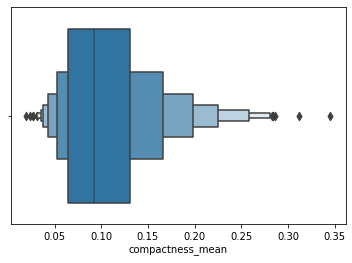

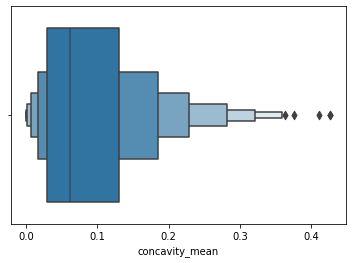

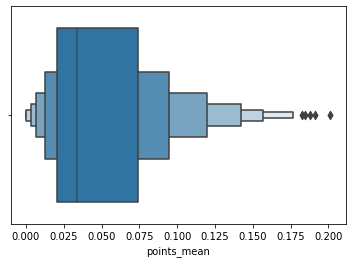

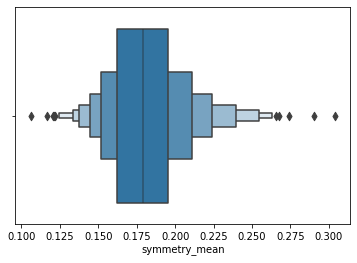

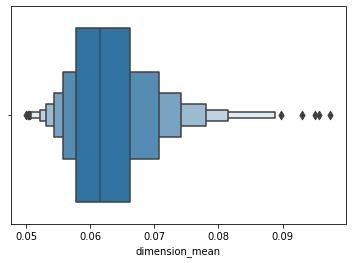

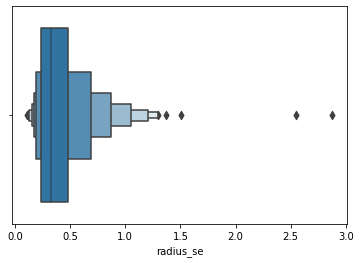

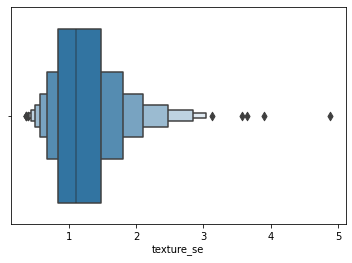

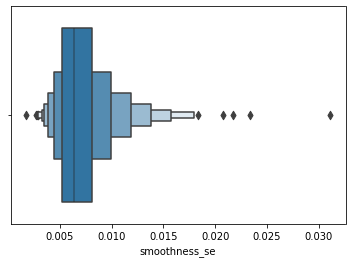

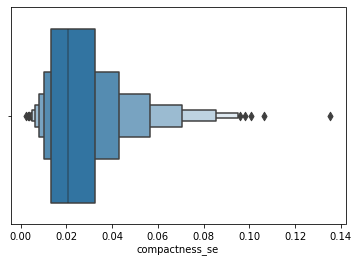

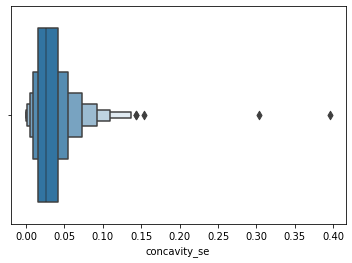

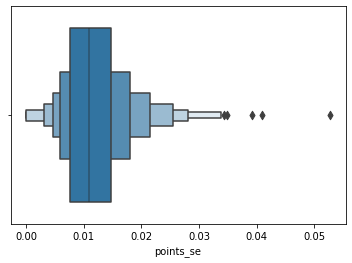

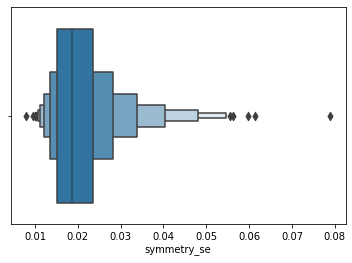

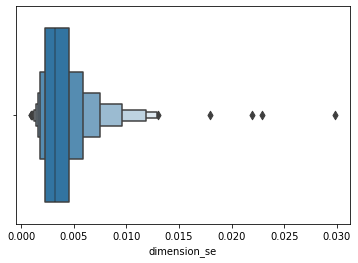

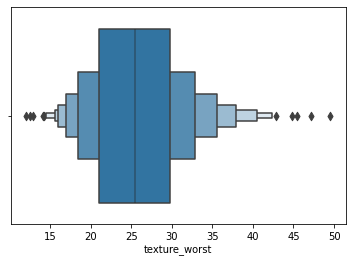

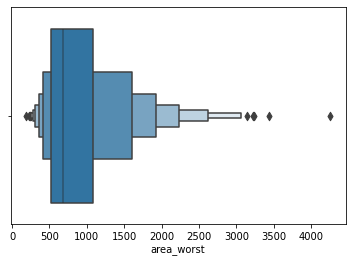

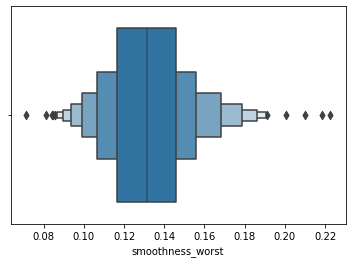

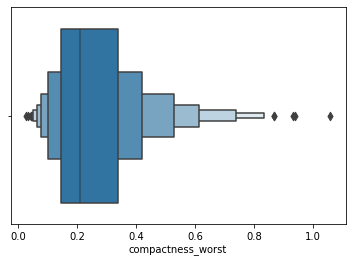

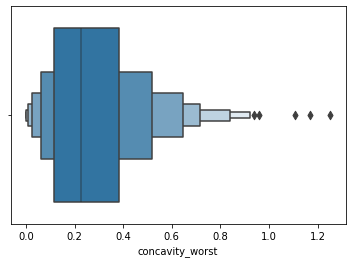

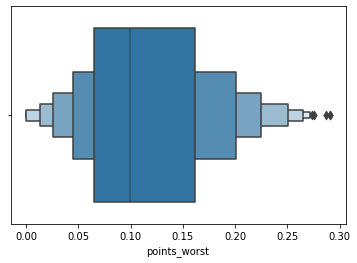

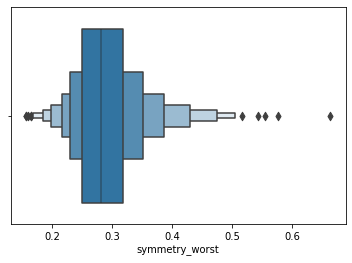

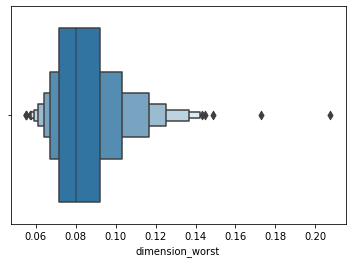

In [13]:
for column in df.columns:
    plt.figure()
    sns.boxenplot(df[column])

## Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = SC.fit_transform(X)
X

array([[-0.51329651, -1.60559452,  0.45828543, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849,  0.03698602, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672,  0.8069961 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674, -0.41206792, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.96356007, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  0.26613874, ...,  1.24848623,
        -0.27624528,  0.15040866]])

In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [16]:
from sklearn import svm

model = svm.SVC(kernel='linear').fit(X_train,y_train)
ypred = model.predict(X_test)
acc = metrics.accuracy_score(y_test,ypred)
ypred[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [17]:
acc

0.9649122807017544

In [18]:
#Calculate the f1 score
f1_score(y_test, ypred, average='weighted')

0.9647515527950311

In [19]:
prediction_df = pd.DataFrame()
prediction_df["actual"] = y_test
prediction_df["predictions"] = model.predict(X_test)

In [20]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [21]:
prediction_df

,actual,predictions
421,1,1
47,1,1
292,1,1
186,1,1
414,0,0
132,0,0
161,0,0
197,0,0
245,0,0
453,0,0


The actual value and the predicted value are shown in the DataFrame

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [23]:
print('confusion matrix\n\n')
print(confusion_matrix(y_test, ypred))


confusion matrix


[[112   2]
 [  4  53]]


In [24]:
print('classification report\n\n')
print(classification_report(y_test, ypred))


classification report


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       114
           1       0.96      0.93      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Text(0.5, 15.0, 'Predicted label')

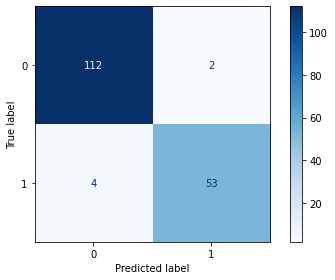

In [25]:
disp = plot_confusion_matrix(model,X_test,y_test,cmap="Blues",values_format='.3g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### The SVM model gives an accuracy of 0.96

## Hyper Parameter Optimization

In [26]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [28]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [29]:
classifier = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [30]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y,eval_metric='rmse')
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 6.44 seconds.


In [31]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [33]:
 classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,eval_metric='mlogloss')

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10,)
score

array([0.96491228, 0.9122807 , 0.96491228, 0.92982456, 1.        ,
       0.94736842, 0.98245614, 1.        , 0.98245614, 1.        ])

In [35]:
score.min()

0.9122807017543859

In [36]:
score.max()

1.0

In [37]:
score.mean()

0.968421052631579

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 100)

In [40]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [41]:
predicted = classifier.predict(X_test)
predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,predicted))

Accuracy:  0.9649122807017544


In [43]:
Hyperparameter_tuned_df = pd.DataFrame()
Hyperparameter_tuned_df["actual"] = y_test
Hyperparameter_tuned_df["predictions"] = model.predict(X_test)

In [44]:

Hyperparameter_tuned_df

,actual,predictions
400,0,0
225,0,0
321,1,1
173,0,0
506,0,0
380,0,0
197,0,0
260,0,0
40,1,0
160,0,0


In [45]:
print(confusion_matrix(y_test, predicted))


[[112   0]
 [  6  53]]


In [46]:
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       112
           1       1.00      0.90      0.95        59

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



Text(0.5, 15.0, 'Predicted label')

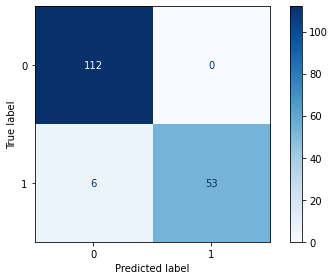

In [47]:
disp = plot_confusion_matrix(classifier,X_test,y_test,cmap="Blues",values_format='.3g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Both SVM model and Hyperparameter Tuning with XGBoost model gives the same result and accuracy.

_________________________